In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [24]:
df = pd.read_csv("happiness.csv")

In [25]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


In [26]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [27]:
df.isna().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [28]:
cols = df.columns
num_cols = df._get_numeric_data().columns

catagorical_data =list(set(cols) - set(num_cols))
catagorical_data

['Country', 'Region']

In [29]:
from sklearn.preprocessing import LabelEncoder
LE= LabelEncoder()


for i in catagorical_data:
    df[i]=LE.fit_transform(df[i])

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    int32  
 1   Region                         158 non-null    int32  
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int32(2), int64(1)
memory usage: 13

In [31]:
df.describe()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,78.500000,5.120253,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754781,2.993321,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,0.000000,0.000000,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,39.250000,3.000000,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,78.500000,4.500000,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,117.750000,8.000000,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,157.000000,9.000000,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [37]:
df.drop(["Happiness Rank","Country"], axis= 1, inplace = True)

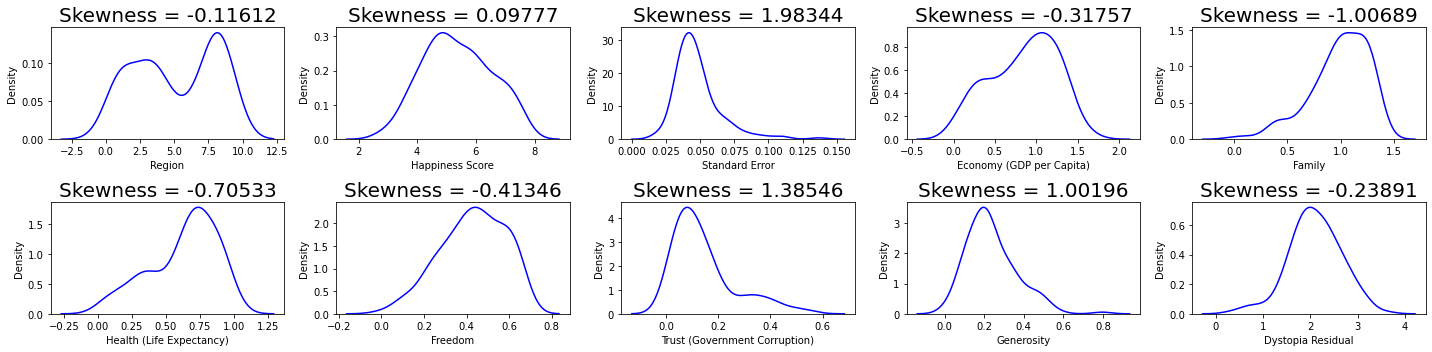

In [40]:
plt.figure(figsize=(20,5))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(2,5,i + 1)         
    sns.kdeplot(df[collist[i]], color = "blue")
    plt.title(f"Skewness = {round(df[collist[i]].skew(),5)}",fontsize=20)
    plt.tight_layout()

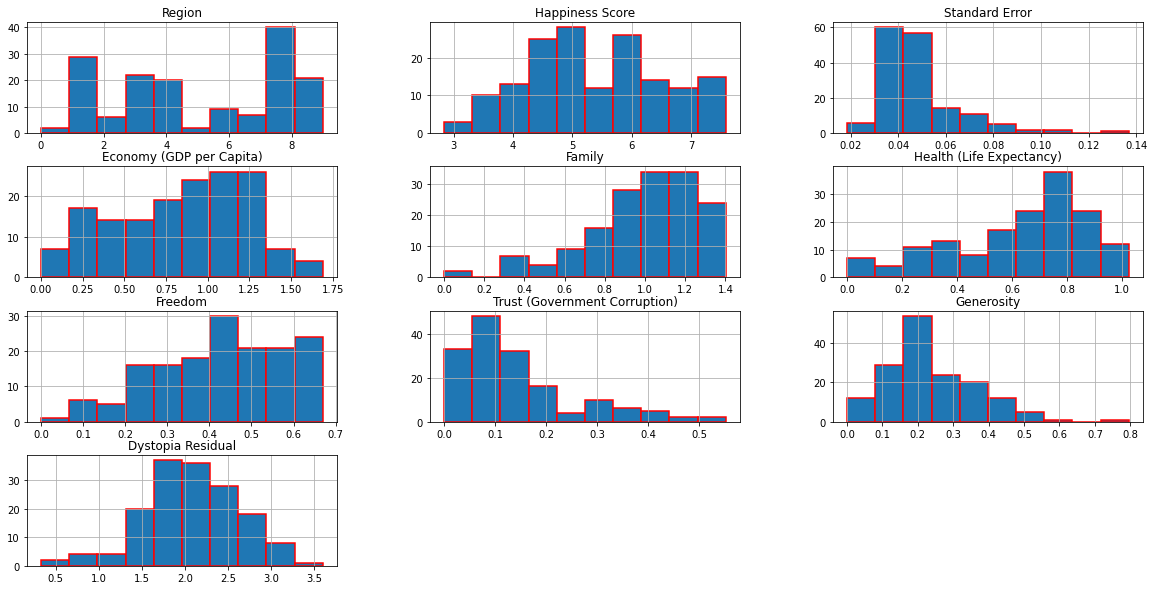

In [41]:
df.hist(edgecolor="red",linewidth= 1.5, figsize= (20,10))
plt.show()

In [42]:
skewness=[]
for i in df.skew().values:
    skewness.append(i)
    
df_skewness= pd.DataFrame({"Feature_names": collist,"Skew": skewness})
df_skewness= df_skewness.sort_values(by="Skew", ascending=False, ignore_index= True)


skew_postive_row= []
skew_negative_row=[]
for index, row in df_skewness.iterrows():
    if row['Skew']>0.49:
        skew_postive_row.append(row['Feature_names'])
    elif row['Skew']< -0.49:
        skew_negative_row.append(row['Feature_names'])
        
df_skewness

,Feature_names,Skew
0,Standard Error,1.983439
1,Trust (Government Corruption),1.385463
2,Generosity,1.001961
3,Happiness Score,0.097769
4,Region,-0.116119
5,Dystopia Residual,-0.238911
6,Economy (GDP per Capita),-0.317575
7,Freedom,-0.413462
8,Health (Life Expectancy),-0.705328
9,Family,-1.006893


In [43]:
print("\n\nFeature names with Skewness is present more than +/-0.5 as follows:\n","\n\nPostive Skewed data:\n", skew_postive_row,"\n\nnegative Skewed data:\n",skew_negative_row)



Feature names with Skewness is present more than +/-0.5 as follows:
 

Postive Skewed data:
 ['Standard Error', 'Trust (Government Corruption)', 'Generosity'] 

negative Skewed data:
 ['Health (Life Expectancy)', 'Family']


BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA


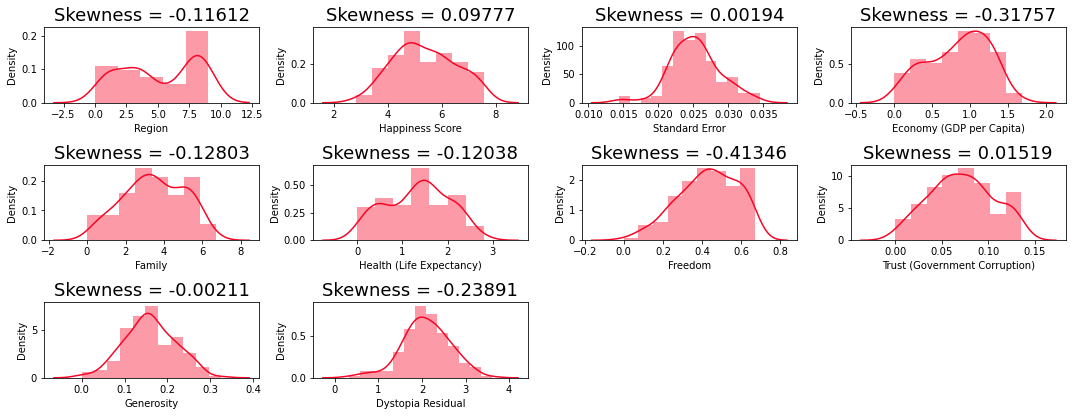

In [45]:
DF=df

from scipy.stats import yeojohnson

for i in skew_postive_row:
    DF[i]= yeojohnson(DF[i])[0]
for i in skew_negative_row:
    DF[i]= yeojohnson(DF[i])[0]   
    
print("BELOW GRAPH WILL SHOW THE SKEWNESS OF THE DATA")
plt.figure(figsize=(15,15))
for i in range (0, len(collist)):
    plt.subplot(8,4,i+1)
    plt.title(f"Skewness = {round(DF[collist[i]].skew(),5)}",fontsize=18)         
    sns.distplot(DF[collist[i]], color = "#f80424")
    plt.tight_layout() 

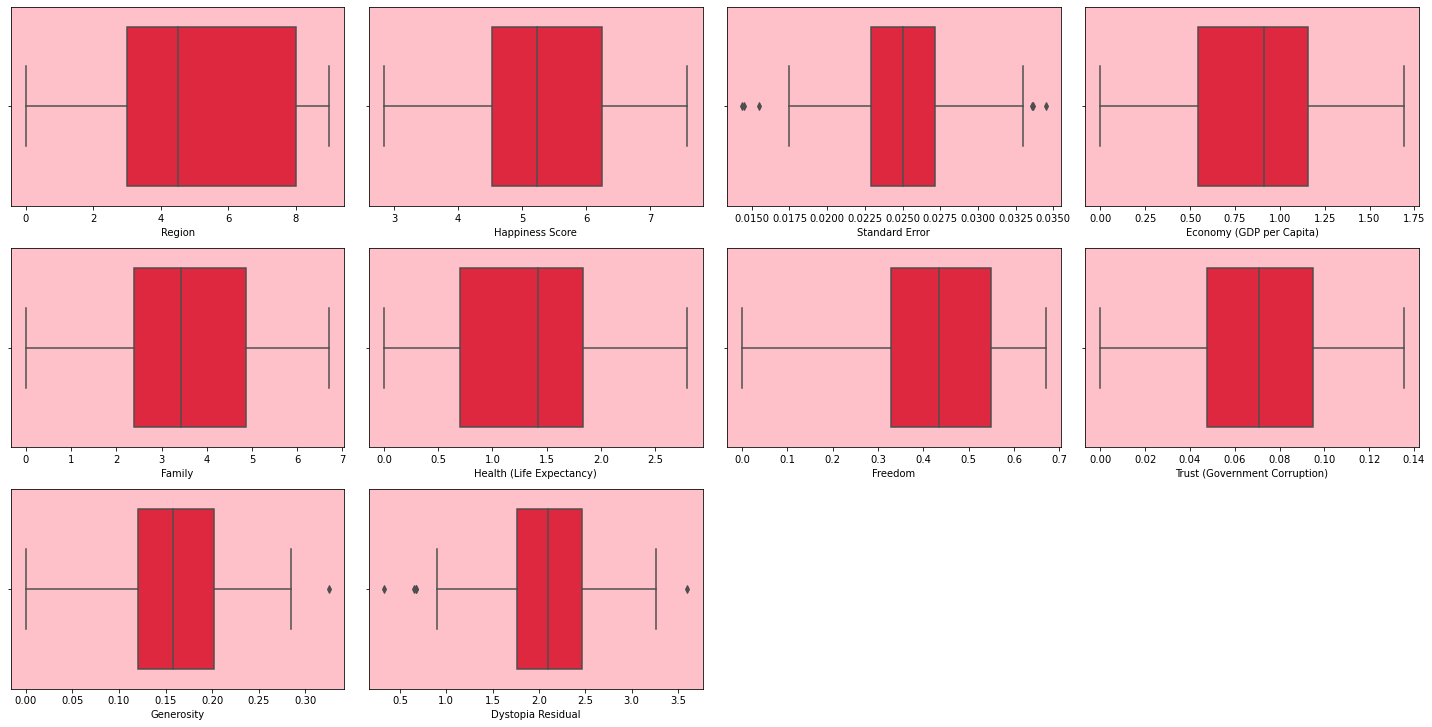

In [46]:
df = DF
plt.figure(figsize=(20,50))
collist = df.columns.values
for i in range (0, len(collist)):
    plt.subplot(15,4,i+1)
    ax=sns.boxplot(df[collist[i]], color = "#fb0a29" , orient = "h")
    ax.set_facecolor("#fec1c9")
    plt.tight_layout()

In [47]:
df1=df

In [48]:
from scipy.stats import zscore
import numpy as np
z= np.abs(zscore(df1))
threshold= 3
df_new = df[(z < 3).all(axis=1)]

In [49]:
print(f"Orginal Data {df1.shape}\nAfter Removing outliers {df_new.shape}\nThe percentage of data loss {((158-155)/158)*100}%")

Orginal Data (158, 10)
After Removing outliers (155, 10)
The percentage of data loss 1.89873417721519%


The outliers exist in the data post the removal of outliers the loss of data is very less so we can remove outliers

In [50]:
df=df_new

# correlation

In [51]:
df.corr()

,Region,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Region,1.000000,-0.209758,-0.024645,-0.285562,-0.162657,-0.305346,0.070997,0.207480,0.293882,-0.065844
Happiness Score,-0.209758,1.000000,-0.183790,0.782586,0.765084,0.760079,0.549270,0.325054,0.189161,0.519518
Standard Error,-0.024645,-0.183790,1.000000,-0.190061,-0.148826,-0.291180,-0.147531,-0.114051,-0.060982,0.042944
Economy (GDP per Capita),-0.285562,0.782586,-0.190061,1.000000,0.657509,0.837371,0.358272,0.184340,-0.048736,0.033802
Family,-0.162657,0.765084,-0.148826,0.657509,1.000000,0.583239,0.485072,0.168279,0.132200,0.149319
Health (Life Expectancy),-0.305346,0.760079,-0.291180,0.837371,0.583239,1.000000,0.379614,0.155109,0.079417,0.046559
Freedom,0.070997,0.549270,-0.147531,0.358272,0.485072,0.379614,1.000000,0.460918,0.413994,0.029052
Trust (Government Corruption),0.207480,0.325054,-0.114051,0.184340,0.168279,0.155109,0.460918,1.000000,0.241590,0.035448
Generosity,0.293882,0.189161,-0.060982,-0.048736,0.132200,0.079417,0.413994,0.241590,1.000000,-0.037215
Dystopia Residual,-0.065844,0.519518,0.042944,0.033802,0.149319,0.046559,0.029052,0.035448,-0.037215,1.000000


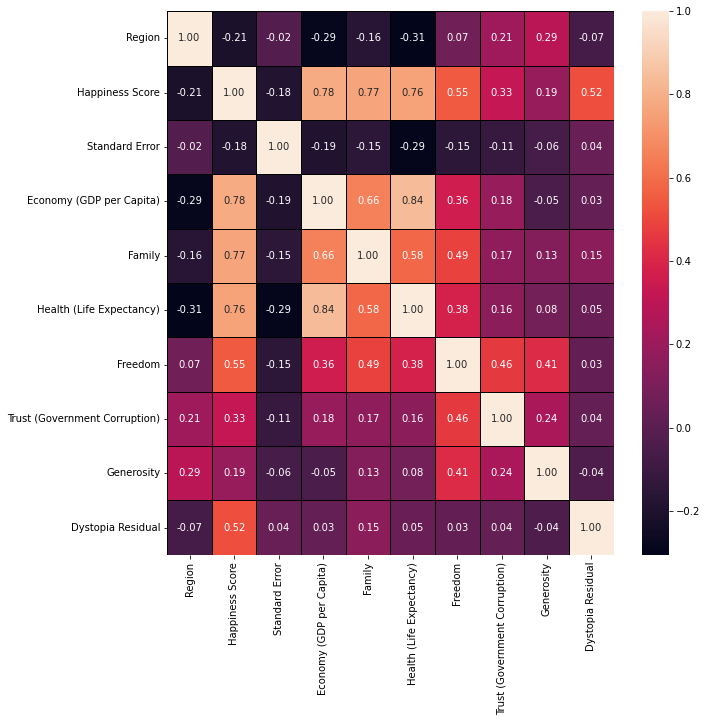

In [53]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True, linewidths=0.5,linecolor='black',fmt='.2f')
plt.show()

Above we can see the happiness score has postive correlation with most of the variable and only region has negativa correlation.
this means increase in factors like GDP per capita, Family, freedom, life expentancy also increases hapiness score
Lets picturise the correlation with the targeet vaariable alone.

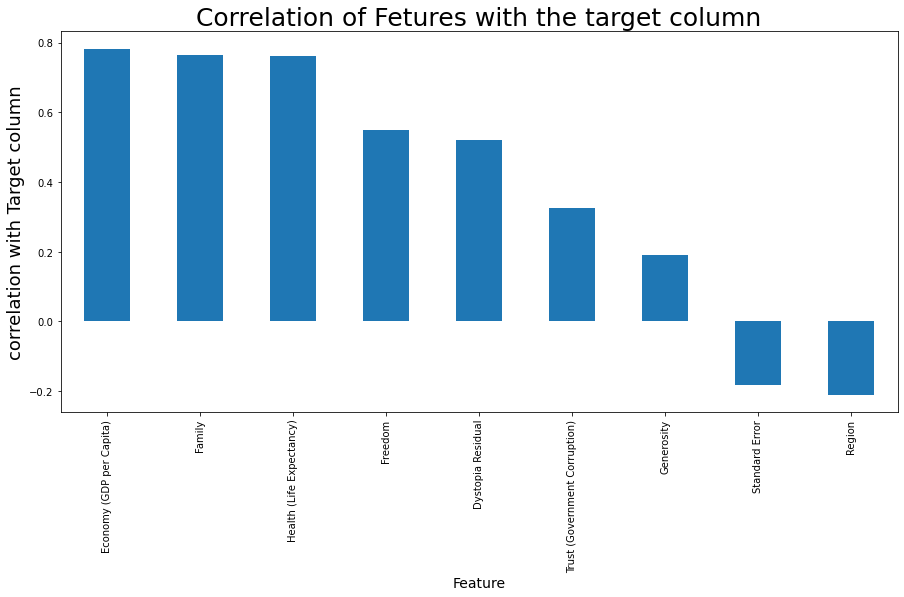

In [54]:
plt.figure(figsize=(15,7))
df.corr()["Happiness Score"].sort_values(ascending=False).drop(["Happiness Score"]).plot.bar()
plt.xlabel("Feature", fontsize= 14)
plt.ylabel("correlation with Target column", fontsize = 18)
plt.title("Correlation of Fetures with the target column", fontsize=25)
plt.show()

In [55]:
orange ="#60010d"
green ="#980216"
grey ="#fc6a7d"
yellow ="#fecad1"
blue ="#fc8292"

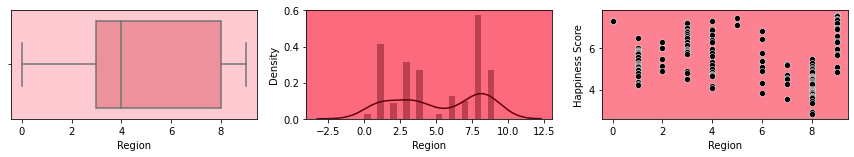

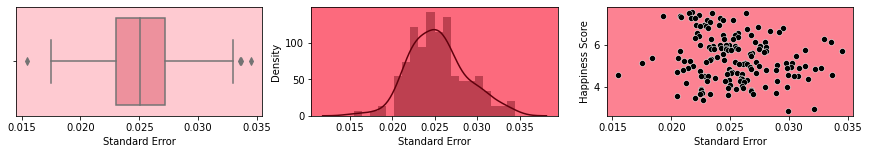

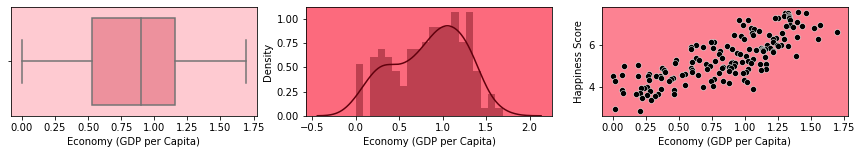

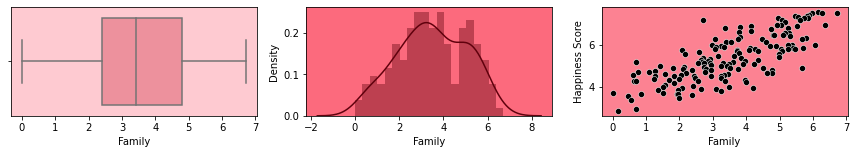

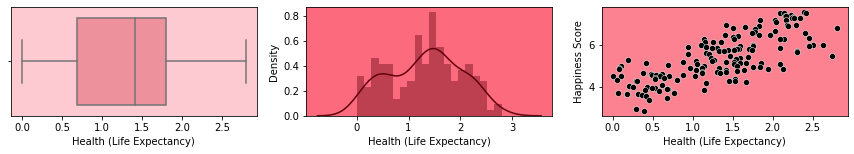

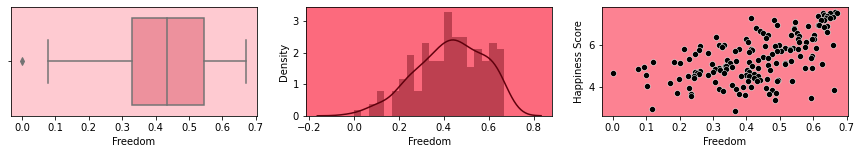

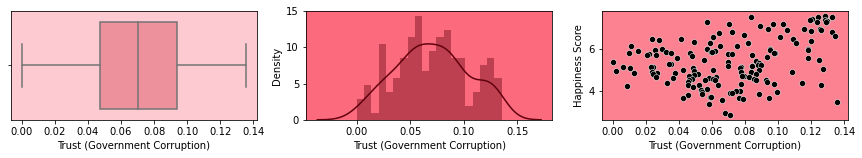

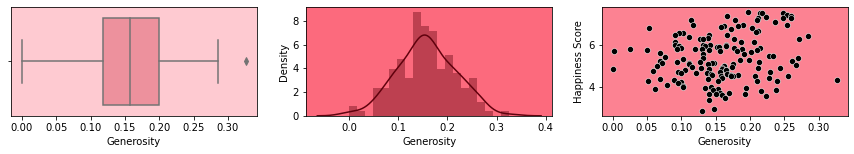

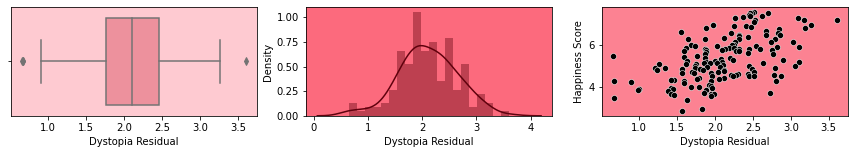

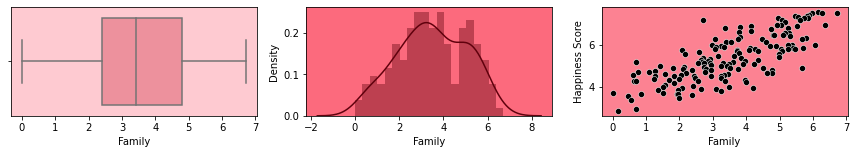

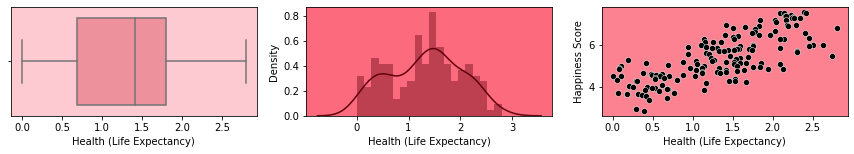

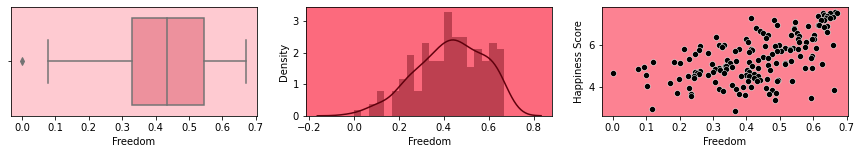

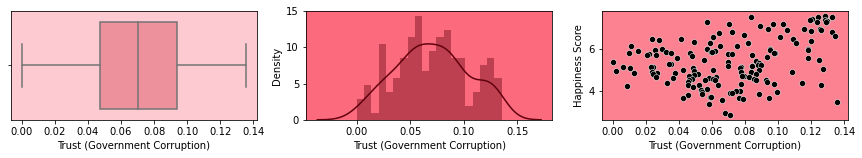

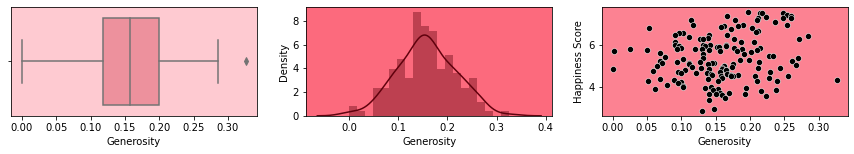

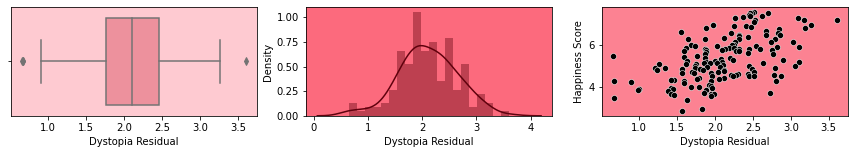

In [56]:
target_variable_1 = "Happiness Score"
feature_variable = ['Region',"Standard Error","Economy (GDP per Capita)","Family","Health (Life Expectancy)","Freedom",
                    "Trust (Government Corruption)","Generosity","Dystopia Residual","Family","Health (Life Expectancy)",
                    "Freedom","Trust (Government Corruption)","Generosity","Dystopia Residual"]


def num_plots(feature_name):
    fig, axs = plt.subplots(1, 3, figsize=(15, 2))
    a1=sns.boxplot(x=df[feature_name], ax=axs[0], color=blue)
    a1.set_facecolor(yellow)
    a2=sns.distplot(df[feature_name], bins=20, kde=True, ax=axs[1],color=orange)
    a2.set_facecolor(grey)
    a3=sns.scatterplot(data=df, x=feature_name, y=target_variable_1, ax=axs[2], color="k")
    a3.set_facecolor(blue)
    plt.show()
    
for i in feature_variable:
    num_plots(i)  

   The distribution of the scattered plot is as per the correlation of the variable when the correlation is higher the distribution is lesser.

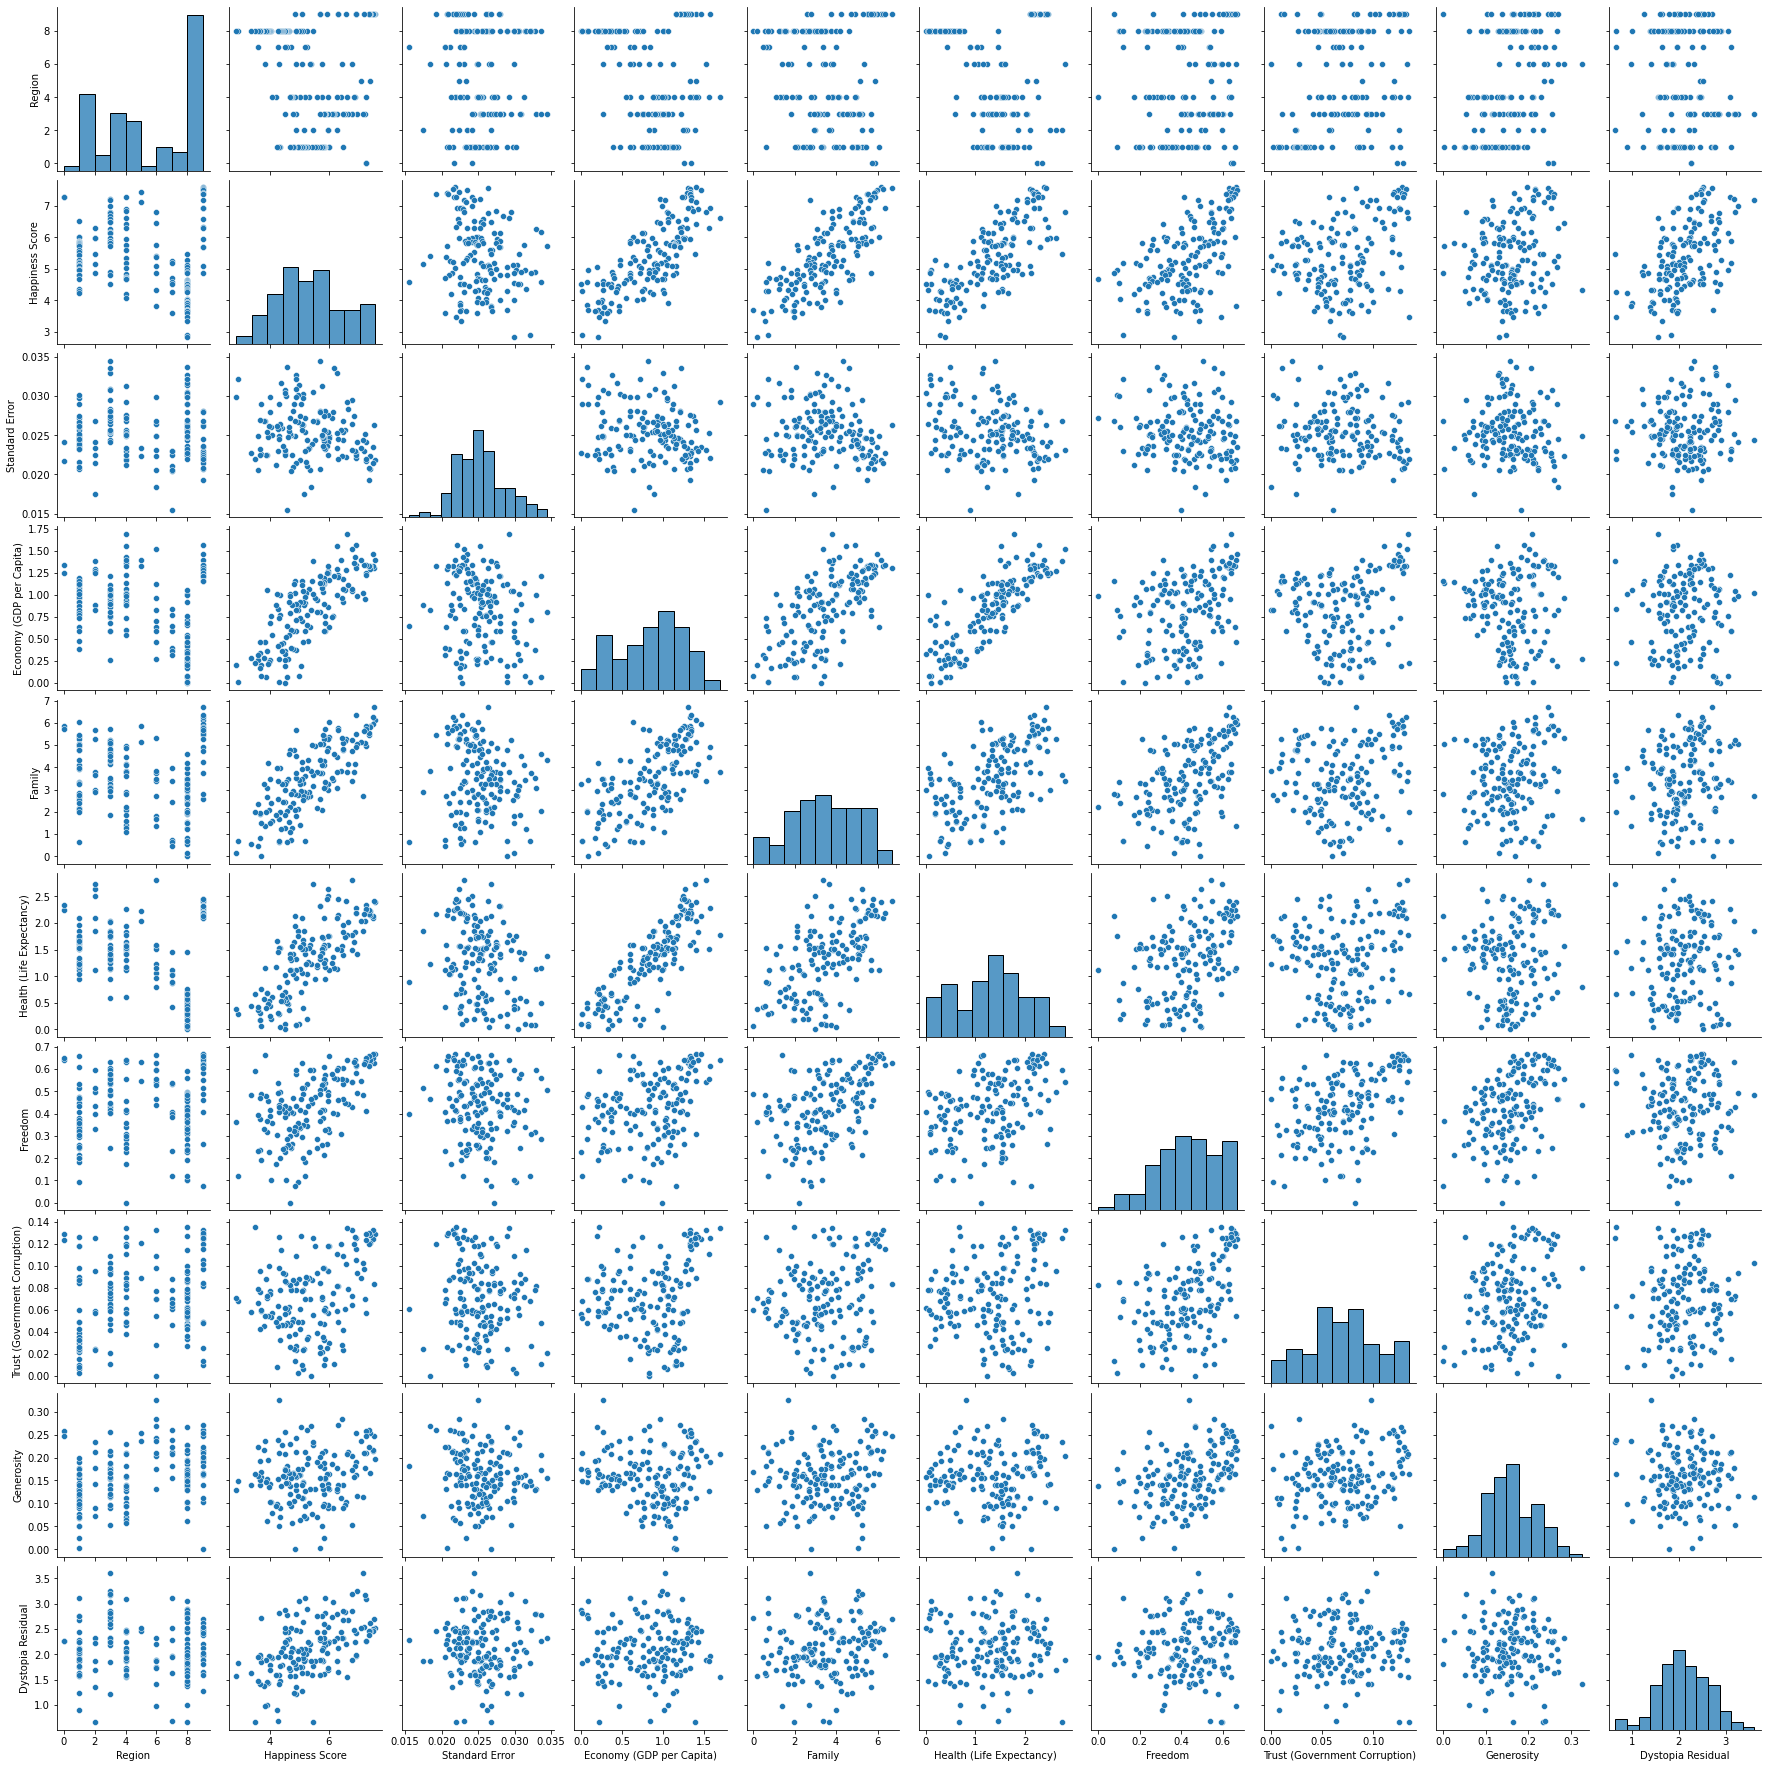

In [58]:
sns.pairplot(df)

1. We have only 1 categorical variable "Region"we totally have 10 regions.
2. Most of the data have high postive correlation. The spread of the data is mostly diagonal down left to upper right.

In [60]:
x_1=df.drop(["Happiness Score"], axis = 1)
y_1=df["Happiness Score"]

In [61]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

accu = 0
for i in range(0,1000):
    x_train, x_test, y_train, y_test = train_test_split(x_1,y_1,test_size = .25, random_state = i)
    mod = LinearRegression()
    mod.fit(x_train,y_train)
    y_pred = mod.predict(x_test)
    tempacc = r2_score(y_test,y_pred)
    if tempacc> accu:
        accu= tempacc
        best_rstate=i

print(f"Best Accuracy {accu*100} found on randomstate {best_rstate}")     

Best Accuracy 99.76115533125258 found on randomstate 962


In [62]:
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(x_1,y_1,test_size = .25, random_state = best_rstate)

In [63]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

In [68]:
models = [LinearRegression(), Lasso(), Ridge(alpha=1, random_state=42), ElasticNet(), SVR(), KNeighborsRegressor(), DecisionTreeRegressor(), AdaBoostRegressor(random_state=42), RandomForestRegressor(random_state=42)]
model_names = ["LinearRegression", "Lasso", "Ridge", "ElasticNet", "SVR", "KNeighborsRegressor", "DecisionTreeRegressor", "AdaBoostRegressor", "RandomForestRegr"]

In [69]:
score= []
mean_abs_e=[]
mean_sqr_e=[]
root_mean_e=[]
r2=[]

for m in models:
    m.fit(x_train_1,y_train_1)
    print("Score of", m, "is:", m.score(x_train_1,y_train_1))
    score.append(m.score(x_train_1,y_train_1))
    predm=m.predict(x_test_1)
    print("\nERROR:")
    print("MEAN ABSOLUTE ERROR: ",mean_absolute_error(y_test_1,predm))
    mean_abs_e.append(mean_absolute_error(y_test_1,predm))
    print("MEAN SQUARED ERROR: ", mean_squared_error(y_test_1,predm))
    mean_sqr_e.append(mean_squared_error(y_test_1,predm))
    print("ROOT MEAN SQUARED ERROR :",np.sqrt(mean_squared_error(y_test_1,predm)))
    root_mean_e.append(np.sqrt(mean_squared_error(y_test_1,predm)))
    print("R2 SCORE: ", r2_score(y_test_1,predm))
    r2.append(r2_score(y_test_1,predm))
    print("**********************************************************************************************************")
    print('\n\n')

Score of LinearRegression() is: 0.9918817756329062

ERROR:
MEAN ABSOLUTE ERROR:  0.04620460403874882
MEAN SQUARED ERROR:  0.003267723326778625
ROOT MEAN SQUARED ERROR : 0.05716400376791871
R2 SCORE:  0.9976115533125258
**********************************************************************************************************



Score of Lasso() is: 0.25635727520837903

ERROR:
MEAN ABSOLUTE ERROR:  0.8573001489535449
MEAN SQUARED ERROR:  1.036154889737482
ROOT MEAN SQUARED ERROR : 1.0179169365608778
R2 SCORE:  0.2426529217382235
**********************************************************************************************************



Score of Ridge(alpha=1, random_state=42) is: 0.9782040205897307

ERROR:
MEAN ABSOLUTE ERROR:  0.1272241756382961
MEAN SQUARED ERROR:  0.026895018119575873
ROOT MEAN SQUARED ERROR : 0.1639970064348001
R2 SCORE:  0.9803418739858295
**********************************************************************************************************



Score of ElasticN

In [70]:
mean_score= []
STD=[]
for m in models:
    CV=cross_val_score(m,x_1,y_1,cv=5,scoring="r2")
    print("SCORE OF",m,"IS:")
    print("SCORE IS:", CV)
    print("MEAN OF SCORE is :", CV.mean())
    mean_score.append(CV.mean())
    print("Standard Deviation :", CV.std())
    STD.append(CV.std())
    print("**************************************************************************************************")
    print("\n\n")

SCORE OF LinearRegression() IS:
SCORE IS: [0.94441045 0.78195498 0.83468218 0.74398479 0.78336401]
MEAN OF SCORE is : 0.8176792842067915
Standard Deviation : 0.06961972425558431
**************************************************************************************************



SCORE OF Lasso() IS:
SCORE IS: [-36.46420045  -7.910286    -0.35342414 -19.61605465 -24.69899016]
MEAN OF SCORE is : -17.80859107832398
Standard Deviation : 12.660454819662123
**************************************************************************************************



SCORE OF Ridge(alpha=1, random_state=42) IS:
SCORE IS: [0.28618114 0.28930828 0.56599812 0.24685051 0.6821267 ]
MEAN OF SCORE is : 0.41409295017071396
Standard Deviation : 0.17596587940576486
**************************************************************************************************



SCORE OF ElasticNet() IS:
SCORE IS: [-32.23622     -6.14852996  -1.26989839 -17.13493821 -16.99981634]
MEAN OF SCORE is : -14.75788057932678
Standar

In [71]:
Regression_result = pd.DataFrame({"MODEL": model_names,
                                  "SCORE": score,
                                  "CV_mean_score": mean_score,
                                  "CV_STD": STD,
                                  "MBE": mean_abs_e,
                                  "MSE": mean_sqr_e,
                                  "RMSE": root_mean_e,
                                  "R2":r2 
                                 })
Regression_result.sort_values(by="CV_mean_score", ascending=False)

,MODEL,SCORE,CV_mean_score,CV_STD,MBE,MSE,RMSE,R2
0,LinearRegression,0.991882,0.817679,0.069620,0.046205,0.003268,0.057164,0.997612
2,Ridge,0.978204,0.414093,0.175966,0.127224,0.026895,0.163997,0.980342
4,SVR,0.927583,-2.207513,1.692718,0.297720,0.149444,0.386580,0.890768
8,RandomForestRegr,0.984659,-3.264857,2.494648,0.276987,0.128323,0.358222,0.906206
7,AdaBoostRegressor,0.958562,-6.121534,1.501144,0.353331,0.192558,0.438814,0.859256
6,DecisionTreeRegressor,1.000000,-7.179479,1.674100,0.356179,0.211508,0.459900,0.845405
5,KNeighborsRegressor,0.884385,-7.284341,2.786965,0.375769,0.243183,0.493136,0.822253
3,ElasticNet,0.460667,-14.757881,10.697809,0.735089,0.782550,0.884619,0.428018
1,Lasso,0.256357,-17.808591,12.660455,0.857300,1.036155,1.017917,0.242653


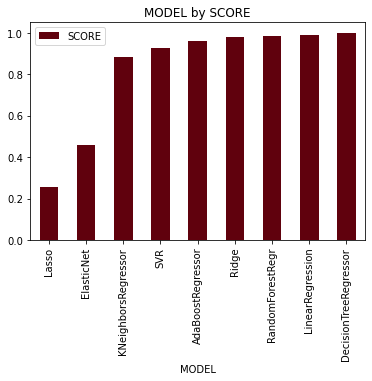

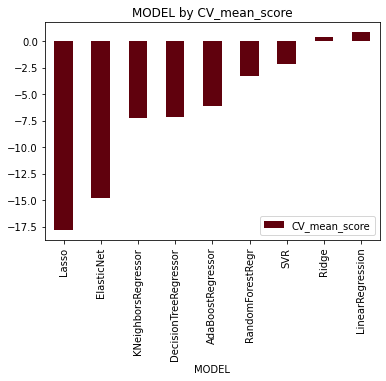

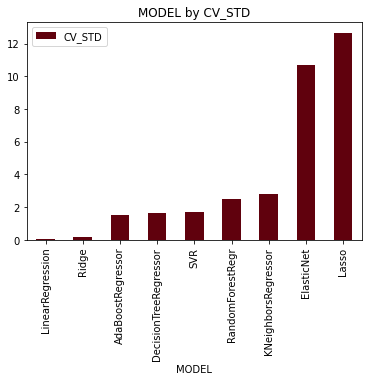

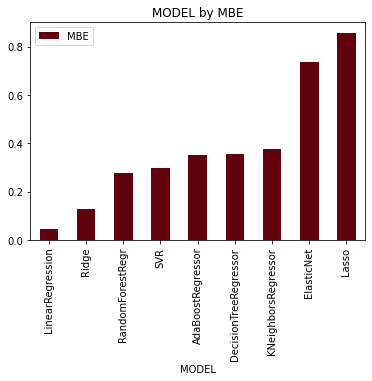

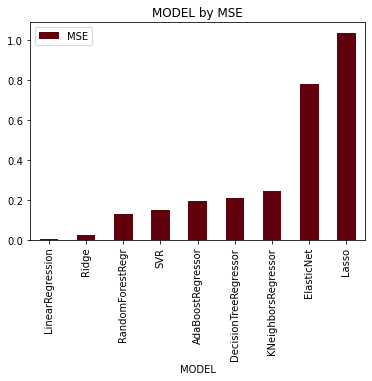

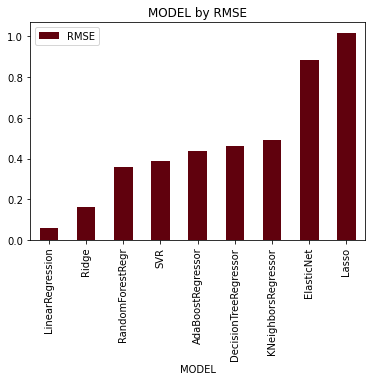

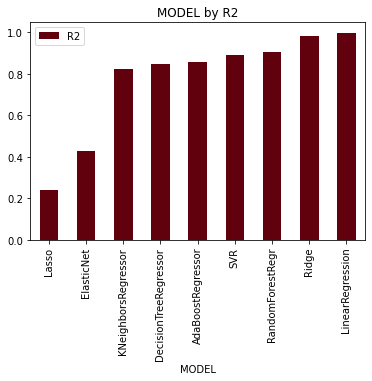

In [72]:
metrics_list = ["SCORE", "CV_mean_score", "CV_STD", "MBE", "MSE", "RMSE", "R2"]

for metric in metrics_list:
    Regression_result.sort_values(by=metric).plot.bar("MODEL", metric, color = orange)
    plt.title(f"MODEL by {metric}")
    plt.show()

In [73]:
lr = LinearRegression()
lr.fit(x_train_1,y_train_1)

LinearRegression()

In [74]:
pred = lr.predict(x_test_1)

In [75]:
lr.score(x_train_1,y_train_1)

0.9918817756329062

In [76]:
import joblib
joblib.dump(lr,"happiness_score.obj")

['happiness_score.obj']

In [77]:
pred_Happiness_Score = pd.DataFrame({"pred_Happiness_Score":pred})
pred_Happiness_Score.head()

,pred_Happiness_Score
0,4.850757
1,4.952039
2,7.100258
3,6.764975
4,4.261092


In [78]:
pred_Happiness_Score.to_csv("pred_Happiness_Score.csv")

The above analysis is the observation of 157 countries hapiness scores and rank. Study which will help to understand the what are all the factors that increases the happiness score. what is the contribution of GDP per capita and trust on the goverment that helps to improve the Quality of living.